In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000 , n_features=2 , n_targets=1 , noise =3) 

In [8]:
X

array([[-1.52125308,  1.33133921],
       [ 0.18534848,  0.98622448],
       [ 1.30034793, -0.37594053],
       ...,
       [ 0.4534107 ,  0.27900977],
       [ 1.42630876,  0.34758971],
       [-1.22980521,  0.71606991]])

In [10]:
y

array([ 1.03144980e+01,  6.17451584e+01,  3.24796062e+01, -8.57891799e+00,
        4.90787281e+01, -6.10045471e+01, -3.30566247e+01,  2.89978057e+01,
       -5.01745556e+01,  5.56232263e+00,  7.82198294e+00,  9.71935622e+01,
       -1.22937786e+01,  3.17921571e+01, -5.49431404e+01, -3.64935149e+01,
       -4.37581849e+01,  9.32066071e+01, -2.88145796e+01,  9.80162781e+01,
        3.16232371e+01,  5.25488442e+01,  1.01601118e+02, -3.99876969e+01,
       -9.68661621e+01, -6.07709623e+01,  6.09730303e+01,  3.57442448e+01,
        1.53460315e+02, -8.50290341e+01, -3.39429552e+01, -2.55360459e+01,
        9.44666299e+01, -1.82260294e+02, -2.78395329e+01, -5.34948395e+01,
        2.16374078e+01, -4.04094636e+01, -1.54965878e+02,  2.97433159e+01,
       -2.71149500e+01, -4.35323902e+01, -1.92513546e+01, -1.70856393e+01,
        1.35027777e+02, -2.02727875e+01, -3.09458023e+00,  1.07250170e+02,
        4.57969865e+01,  9.71899528e+00, -8.64692555e+01, -2.90742502e+01,
        1.89448785e+01,  

<Axes: xlabel='0', ylabel='1'>

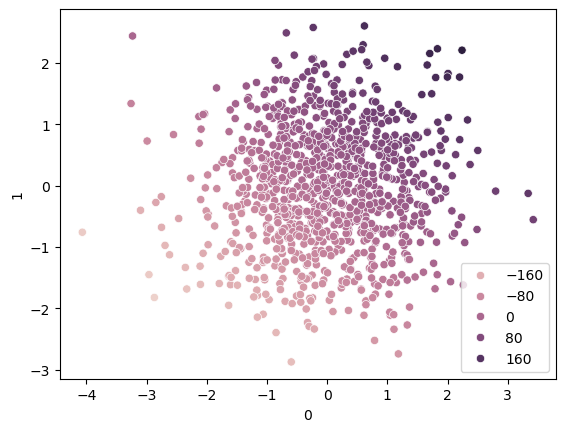

In [22]:
sns.scatterplot(x=pd.DataFrame(X)[0] , y = pd.DataFrame(X)[1] , hue = y)

In [26]:
from sklearn.model_selection import  train_test_split
X_train  , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.3 ,random_state=1) 

In [58]:
from sklearn.svm import SVR
model = SVR(kernel='linear')

In [60]:
model

SVR(kernel='linear')

In [62]:
model.fit(X_train , y_train)

SVR(kernel='linear')

In [64]:
y_pred = model.predict(X_test)

In [66]:
y_pred

array([ 5.38581401e+00,  1.79133458e+01,  4.67814505e+01, -1.26945335e+02,
       -7.66297833e+01,  7.62922584e+01,  6.76463231e+01, -1.98962502e+02,
        2.91879619e+01,  8.05864789e+00, -1.96756275e+01,  4.20846641e+01,
       -3.32642374e+01,  1.61991176e+02, -1.56018277e+02, -6.56379289e+01,
        6.06524269e+00, -3.84434565e+01,  5.27984771e+01, -5.82391670e+00,
        2.41923731e+01, -5.66247920e+01, -3.01099546e+01,  7.10861486e+01,
        4.68968146e+01, -1.22425605e+01, -2.63159329e+01,  2.91475239e+01,
       -3.56099030e+00,  2.34664351e+01, -3.98670167e+01, -7.74788010e+01,
       -7.02497185e+01,  1.22251162e+02, -1.07719152e+01,  7.90505497e+01,
        5.15566308e+01, -8.98265554e+01,  1.74844236e+01, -8.09336270e+01,
        1.18772573e+02,  7.99432208e+00,  1.23273203e+02, -1.58702279e+01,
        4.81617652e+01,  6.31910249e+00,  3.79339223e+01, -4.27934497e+01,
       -2.35944687e+01, -9.64036768e+01, -3.45035538e+01, -2.61869569e+01,
       -1.75058289e+01, -

<Axes: >

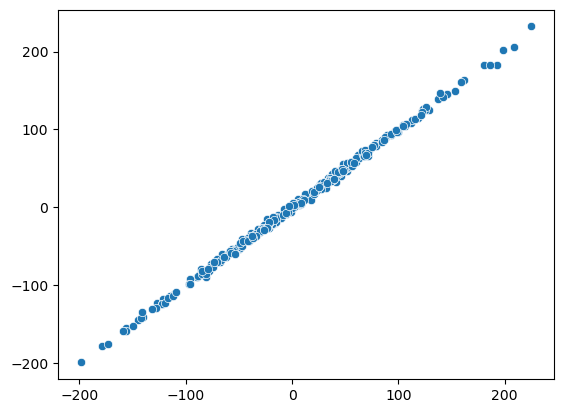

In [70]:
sns.scatterplot(x=y_pred , y=y_test  )

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.998484891136262

In [74]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
params ={
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto'],  # or [0.001, 0.01, 0.1, 1] for more control
    'degree': [2, 3, 4]  # used only when kernel='poly'
}
grid = GridSearchCV(SVR() , param_grid= params , cv=5 , verbose=3)
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'epsilon': [0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [76]:
grid.fit(X_train , y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.172 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.151 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.183 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.148 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.172 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.852 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.836 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.860 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.842 total time=   0.0s
[CV 5/5] END C=

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'epsilon': [0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [78]:
grid.best_params_

{'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [80]:
grid.best_score_

0.9981007007358903

In [83]:
grid.best_estimator_

SVR(C=10, degree=2, epsilon=0.01, kernel='linear')

In [85]:
final_model = grid.best_estimator_

In [89]:
y_pred = final_model.predict(X_test)

In [91]:
r2_score(y_test , y_pred)

0.9984903392153354